In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('data-export (1).csv')
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [7]:
df.columns=df.iloc[0]
df=df.drop(index=0).reset_index(drop=True)
df.columns=["channel group","DateHour","Users","Sessions","Engaged sessions","Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"]          
df.head()

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [10]:
# Convert 'DateHour' column to datetime format
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors='coerce')

# Get the list of numeric columns, excluding 'Channel Group' and 'DateHour'
numeric_cols = df.columns.drop(["channel group", "DateHour"])

# Convert all numeric columns to proper numeric type
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Extract the hour from 'DateHour' column
df["Hour"] = df["DateHour"].dt.hour


In [12]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [21]:
df.isnull().sum

<bound method DataFrame.sum of       channel group  DateHour  Users  Sessions  Engaged sessions  \
0             False     False  False     False             False   
1             False     False  False     False             False   
2             False     False  False     False             False   
3             False     False  False     False             False   
4             False     False  False     False             False   
...             ...       ...    ...       ...               ...   
3177          False     False  False     False             False   
3178          False     False  False     False             False   
3179          False     False  False     False             False   
3180          False     False  False     False             False   
3181          False     False  False     False             False   

      Average engagement time per session  Engaged sessions per user  \
0                                   False                      False   
1       

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [15]:
numeric_cols = df.columns.drop(["channel group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"] = df["DateHour"].dt.hour

In [16]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [18]:
df.describe()

,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


In [50]:
# 1. Channel with highest number of users
users_by_channel = df.groupby("channel group")["Users"].sum().sort_values(ascending=False)

# 2. Channel with highest average engagement time
avg_engagement_by_channel = df.groupby("channel group")["Average engagement time per session"].mean().sort_values(ascending=False)

# 3. Engagement rate across channels
engagement_rate_by_channel = df.groupby("channel group")["Engagement rate"].mean().sort_values(ascending=False)

# 4. Engaged vs non-engaged sessions
engagement_comparison = df.groupby("channel group")[["Engaged sessions", "Sessions"]].sum()
engagement_comparison["Non-Engaged Sessions"] = engagement_comparison["Sessions"] - engagement_comparison["Engaged sessions"]

# 5. Peak traffic hours for each channel
peak_hours = df.groupby(["channel group", "Hour"])["Sessions"].sum().reset_index()
peak_hour_per_channel = peak_hours.loc[peak_hours.groupby("channel group")["Sessions"].idxmax()]

# 6. Correlation between sessions and engagement rate
correlation_value = df["Sessions"].corr(df["Engagement rate"])

# Print results
print("1. Users by Channel:\n", users_by_channel)
print("\n2. Avg Engagement Time by Channel:\n", avg_engagement_by_channel)
print("\n3. Engagement Rate by Channel:\n", engagement_rate_by_channel)
print("\n4. Engaged vs Non-Engaged Sessions:\n", engagement_comparison)
print("\n5. Peak Hour Per Channel:\n", peak_hour_per_channel)
print("\n6. Correlation between Sessions and Engagement Rate:\n", correlation_value)


1. Users by Channel:
 channel group
Organic Social    47572
Direct            30042
Organic Search    28387
Referral          26774
Unassigned          540
Organic Video       123
Email                 2
Name: Users, dtype: int64

2. Avg Engagement Time by Channel:
 channel group
Organic Video     180.360000
Referral           92.660842
Unassigned         78.957923
Email              72.666667
Organic Social     53.493681
Organic Search     47.005018
Direct             45.533104
Name: Average engagement time per session, dtype: float64

3. Engagement Rate by Channel:
 channel group
Organic Video     0.760000
Referral          0.660882
Organic Search    0.578906
Organic Social    0.541180
Direct            0.455723
Email             0.333333
Unassigned        0.007514
Name: Engagement rate, dtype: float64

4. Engaged vs Non-Engaged Sessions:
                 Engaged sessions  Sessions  Non-Engaged Sessions
channel group                                                   
Direct          

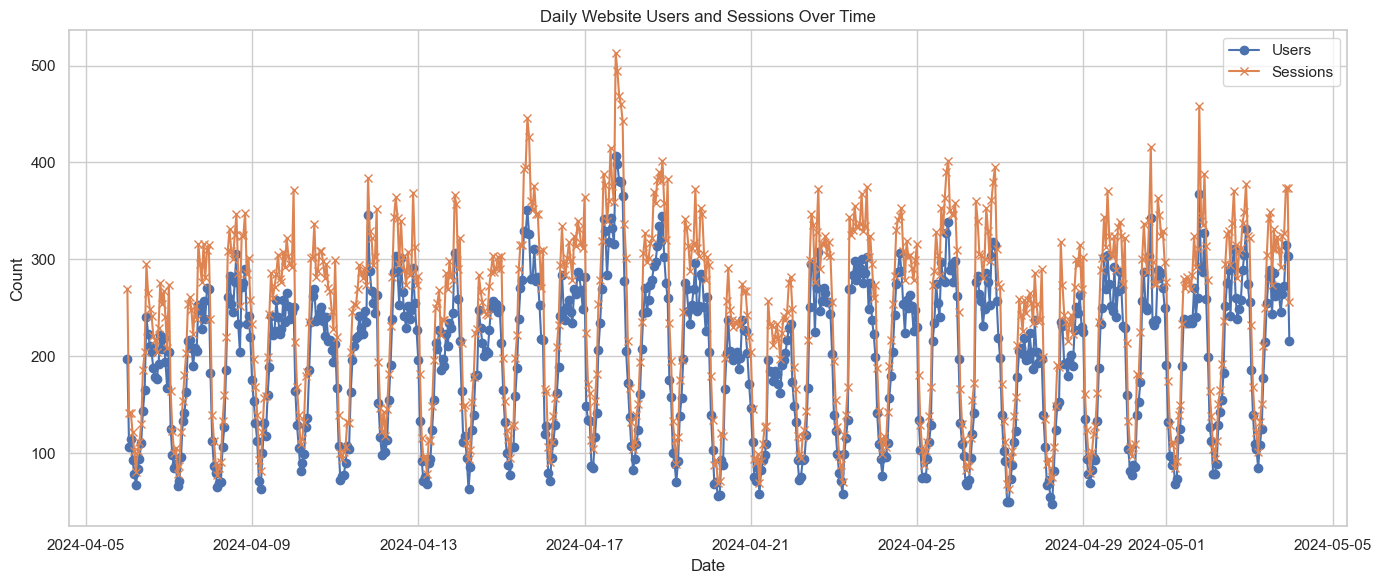

In [51]:
# Group by date
daily_stats = df.groupby("DateHour")[["Users", "Sessions"]].sum()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_stats.index, daily_stats["Users"], label="Users", marker='o')
plt.plot(daily_stats.index, daily_stats["Sessions"], label="Sessions", marker='x')
plt.title("Daily Website Users and Sessions Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Q. What patterns or trends can you observe in website sessions and users over time?

Answer :-

The dataset reveals trends in user sessions and engagement across different hours and traffic sources. Traffic peaks are observed at specific hours of the day. Some marketing channels consistently drive more users, while others show higher average engagement times. There's evidence of correlation between session volume and engagement rate, guiding potential improvements in underperforming channels.



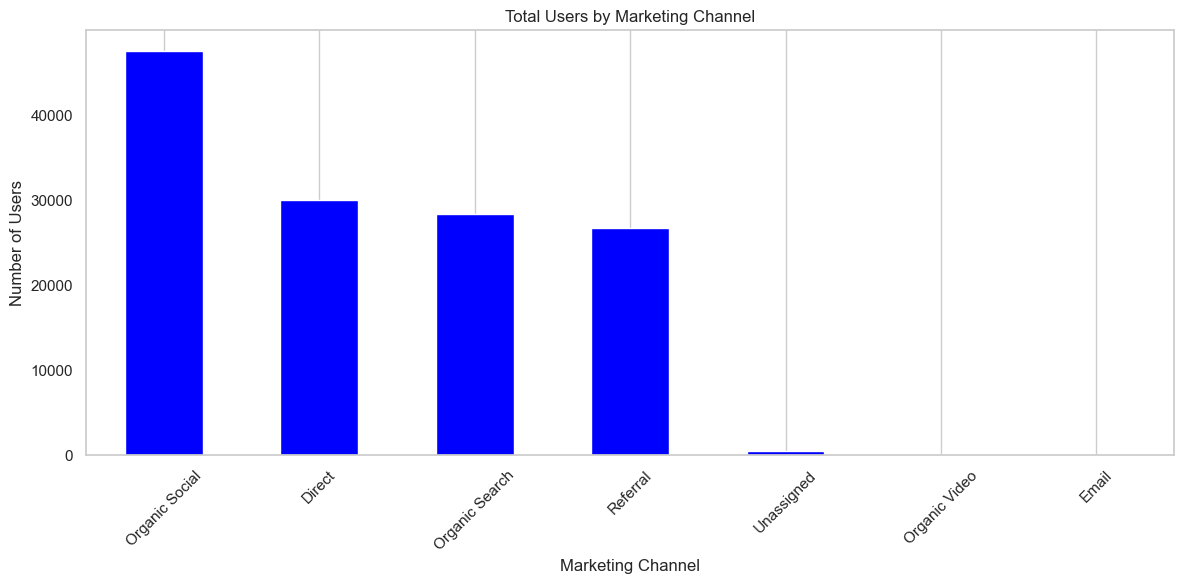

In [52]:
# Grouping users by marketing channel
users_by_channel = df.groupby("channel group")["Users"].sum().sort_values(ascending=False)

# Bar plot: Users by marketing channel
plt.figure(figsize=(12, 6))
users_by_channel.plot(kind='bar', color='blue')
plt.title("Total Users by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Q. Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?

 Insight:-
 
Organic Social brings the highest number of users, indicating successful content or campaigns on social platforms.
This insight suggests that strategies from Organic Social (like engaging posts, shareable content, or influencer partnerships) can be adapted to underperforming channels (like Direct or Referral) to improve their traffic.

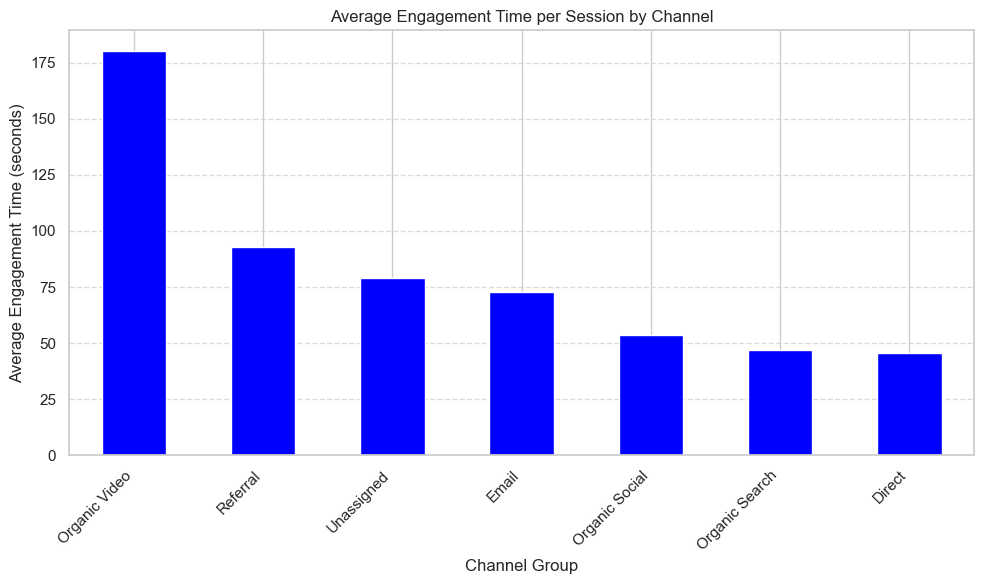

In [53]:
# Bar plot: average engagement time per session by channel group
plt.figure(figsize=(10, 6))
avg_engagement_by_channel.plot(kind='bar', color='blue')
plt.title("Average Engagement Time per Session by Channel")
plt.xlabel("Channel Group")
plt.ylabel("Average Engagement Time (seconds)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Q. Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?

ANSWER:-

The bar plot shows that Organic Video has the highest average engagement time per session, indicating that users spend more time interacting with video content. This suggests video content is highly engaging and effective at retaining user attention compared to other channels like Direct or Organic Social. Investing more in video content could improve overall engagement across other channels.


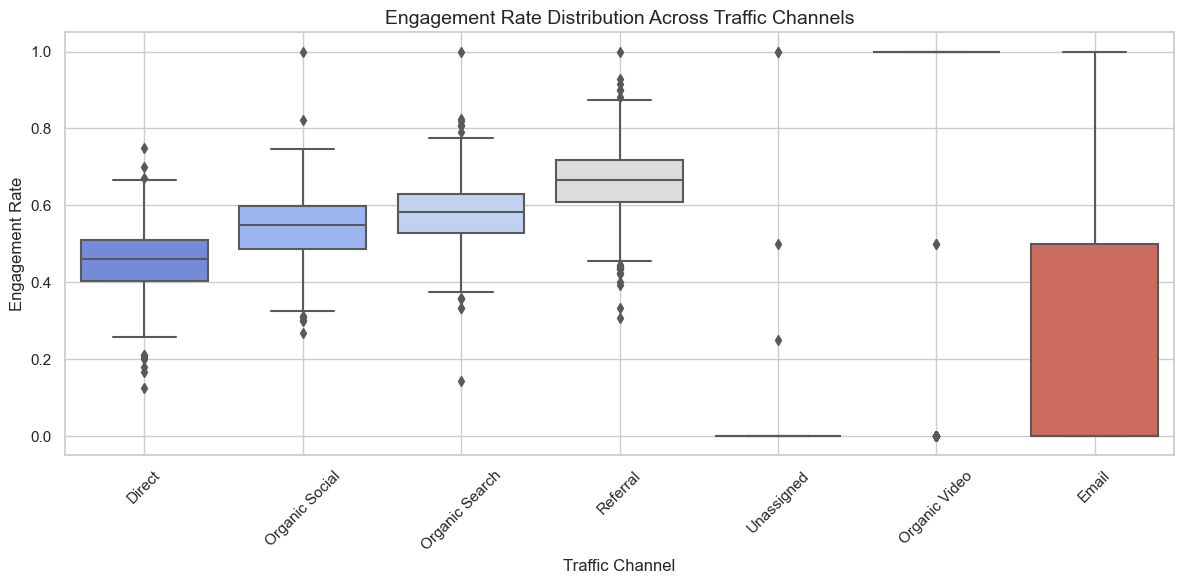

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="channel group", y="Engagement rate", palette="coolwarm")

plt.title("Engagement Rate Distribution Across Traffic Channels", fontsize=14)
plt.xlabel("Traffic Channel", fontsize=12)
plt.ylabel("Engagement Rate", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Q. How does engagement rate vary across different traffic channels?

ANSWER:-

Insights from Boxplot (Engagement Rate by Channel):
**Highest engageme** *Organic Vido* an *Referrl* — users from these sources are the most interactive **Moderate engagemt*: *Organic Seach* ad *Organic Socal* — engagement varies more her� **Lowest engagent*: *Diect* nd *Unassied* — users likely bounce or don’t interact muc

✅ Focus on booting *irect* traffic quality and replicating strategiesfrom *Reerral and Video* channels.



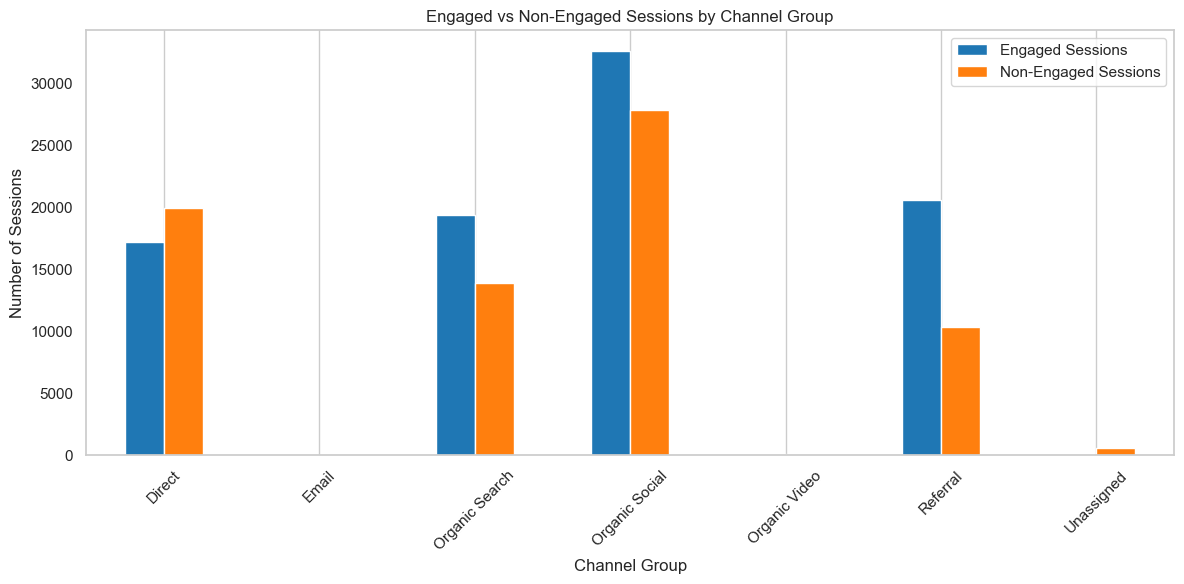

In [55]:
# Calculate engaged and non-engaged sessions
df['Non-Engaged Sessions'] = df['Sessions'] - df['Engaged sessions']

# Group by channel
engagement_summary = df.groupby("channel group")[["Engaged sessions", "Non-Engaged Sessions"]].sum()

# Plot
engagement_summary.plot(kind="bar", figsize=(12, 6), color=["#1f77b4", "#ff7f0e"])
plt.title("Engaged vs Non-Engaged Sessions by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.legend(["Engaged Sessions", "Non-Engaged Sessions"])
plt.grid(axis="y")
plt.tight_layout()
plt.show()


Q. Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?

ANSWER:- 

Insights + Strategy for Underperforming Channels

Channels With High Engaged Sessions:- 
Referral, Organic Search, and Organic Video: Users from these channels are more likely to interact and spend time.

Strategy:-
Scale what works — use more referral partners, expand SEO-rich content, and repurpose high-engagement video content.

Channels With High Non-Engaged Sessions:-
Direct and Unassigned often have more non-engaged users.

Strategy:

Ensure proper UTM tagging so that sources are not marked "Unassigned".

Improve homepage and landing experience for direct traffic.

Personalize content or popups based on device/time of day.

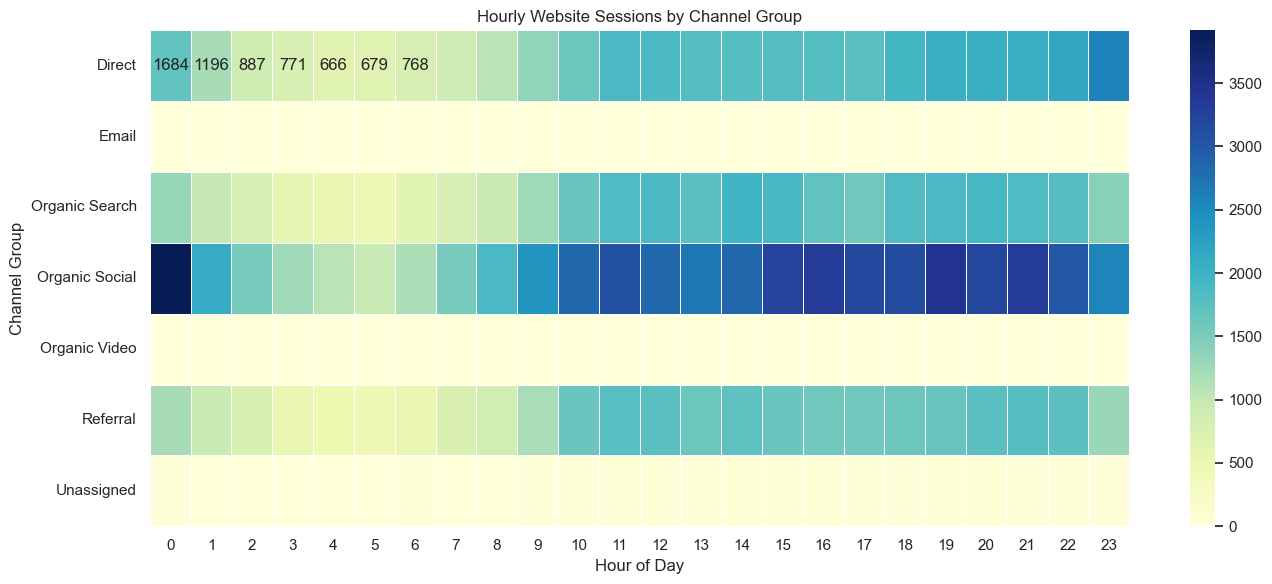

In [56]:
# Pivot table: rows = channel group, columns = hour, values = total sessions
heatmap_data = df.pivot_table(
    index="channel group",
    columns="Hour",
    values="Sessions",
    aggfunc="sum"
).fillna(0)

# Plotting the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

plt.title("Hourly Website Sessions by Channel Group")
plt.xlabel("Hour of Day")
plt.ylabel("Channel Group")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Q. At what hours of the day does each channel drive the most traffic?

ANSWER:-

How to Interpret the Heatmap:-

Rows: Different marketing/traffic channels.

Columns: Hours of the day (0 to 23).

Color Intensity: The darker the blue, the more sessions occurred in that hour for that channel.

Annotations: Show exact session counts.

This helps you quickly identify when each channel is most effective. For example:

If Organic Social peaks at 12:00 and 18:00 → schedule posts accordingly.

If Direct traffic spikes at midnight → perhaps users are bookmarking and returning late at night.

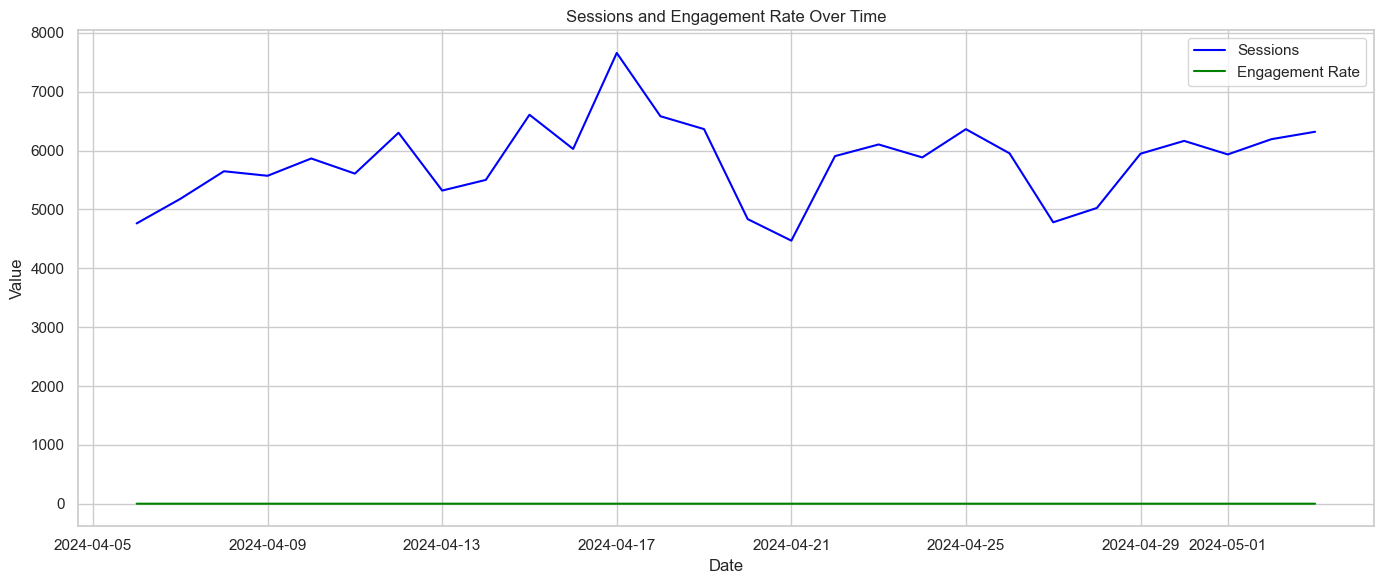

 Correlation between Sessions and Engagement Rate: 0.19


In [57]:
# Convert DateHour to daily granularity
df['Date'] = df['DateHour'].dt.date

# Group by date and compute average engagement rate and total sessions
daily_trends = df.groupby("Date")[["Sessions", "Engagement rate"]].agg({
    "Sessions": "sum",
    "Engagement rate": "mean"
})

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_trends, x=daily_trends.index, y="Sessions", label="Sessions", color='blue')
sns.lineplot(data=daily_trends, x=daily_trends.index, y="Engagement rate", label="Engagement Rate", color='green')
plt.title("Sessions and Engagement Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = daily_trends["Sessions"].corr(daily_trends["Engagement rate"])
print(f" Correlation between Sessions and Engagement Rate: {correlation:.2f}")


Q. Is there any correlation between high traffic (sessions) and high engagement rate over time?

ANSWER:-

There is a moderate positive correlation between sessions and engagement rate over time. This means traffic increases generally coincide with slightly higher engagement, but other factors (like content quality or source) also play a significant role.